In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #한글 깨짐 방지(실행 후 런타임 재시작/그러고 다시 누르지말기)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,969 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
 import matplotlib.pyplot as plt

 plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

X_train_over=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_train_over.csv')
y_train_over=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_train_over.csv')
X_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_valid.csv')
y_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_valid.csv')
X_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_test.csv')
y_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_test.csv')


In [ ]:
train=pd.concat([X_train_over,y_train_over],axis=1) 
valid=pd.concat([X_valid,y_valid],axis=1)
test=pd.concat([X_test,y_test],axis=1)

In [ ]:
print(y_train_over.value_counts())

target
0         8300
1         5343
dtype: int64


In [ ]:
print(y_valid.value_counts())

target
0         8300
1         1344
dtype: int64


In [ ]:
test.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,1,0,0,1,0,0,14.141682,0.637167,33.810996,0
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,0,0,1,0,0,0,25.347198,8.351814,17.922563,0
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,1,1,0,0,0,0,17.752927,0.359481,31.331439,0
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,1,0,0,1,0,0,0.935807,7.554166,56.247248,0
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0.000000,0.000000,21.714145,0


In [ ]:
train.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target
0,8864.554143,0.003774,0.045283,0.011321,0.003774,0.0,0.018868,0.724528,0.007547,0.184906,...,1.0,0.0,0.0,0.0,0.0,1.0,3.321015,3.045777,47.647019,0
1,16049.660275,0.021322,0.038380,0.000000,0.002132,0.0,0.008529,0.869936,0.008529,0.046908,...,1.0,1.0,0.0,0.0,0.0,0.0,3.479070,0.454440,56.969353,0
2,25014.138052,0.000000,0.006757,0.000000,0.000000,0.0,0.236486,0.601351,0.081081,0.074324,...,1.0,0.0,0.0,0.0,1.0,0.0,0.070885,2.815405,47.647019,0
3,2961.172816,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,22.334630,3.926351,13.113916,1
4,424.264069,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,2.964227,13.113916,1


In [ ]:
valid.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target
0,65440.853743,0.000000,0.009615,0.000000,0.009615,0.000000,0.014423,0.850962,0.004808,0.091346,...,1,0,0,0,1,0,4.913146,8.025758,52.455666,0
1,30895.140464,0.029412,0.004202,0.058824,0.000000,0.004202,0.054622,0.722689,0.025210,0.096639,...,0,0,0,0,1,0,13.806588,4.683716,52.455666,0
2,6678.565813,0.058824,0.011765,0.023529,0.000000,0.035294,0.035294,0.588235,0.047059,0.200000,...,1,0,1,0,0,0,31.392960,14.837182,45.167462,0
3,27154.518252,0.011494,0.022989,0.172414,0.000000,0.045977,0.068966,0.551724,0.011494,0.057471,...,1,0,1,0,0,0,0.420433,6.080577,39.341749,0
4,50250.713873,0.000000,0.016949,0.118644,0.000000,0.000000,0.084746,0.728814,0.016949,0.033898,...,1,0,0,0,1,0,9.991694,3.697958,34.828062,0


In [ ]:
print(train.shape,valid.shape,test.shape)

(13643, 30) (9644, 30) (8266, 30)


# Pycaret setup

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 26.8 MB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
     |████████████████████████████████| 262 kB 75.2 MB/s 
     |████████████████████████████████| 134 kB 71.8 MB/s 
     |████████████████████████████████| 1.7 MB 58.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 47.6 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 38.8 MB/s 
     |████████████████████████████████| 6.8 MB 55.0 MB/s 
     |████████████████████████████████| 17.0 MB 215 kB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 3.3 MB 73.4 MB/s 
     |████████████████████████████████| 

In [ ]:
# colab 환경 enable
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


In [ ]:
#pycaret.classification import에서 발생하는 error를 해결하기위함
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import jinja2
from pycaret.classification import * #실행 한번하고 런타임 다시 시작해야됨

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# best3/5 앙상블 & 단일모델 생성


In [ ]:
# 'target' column is the target variable
clf = setup(data = train,
            target = 'target',
            test_data =  valid,
            normalize = True,
            normalize_method='minmax',
            session_id = 25,
            fold = 5
            )

,Description,Value
0,session_id,25
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(13643, 30)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                                  target='target')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers',

In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7fe8835bc290>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x7fe88362d290>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7fe8835bc7a0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7fe8835bcb00>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8783,0.8673,0.8161,0.8470,0.7989,0.7256,0.7426,0.150
xgboost,Extreme Gradient Boosting,0.8879,0.9730,0.7927,0.8965,0.7833,0.7367,0.7580,2.964
lightgbm,Light Gradient Boosting Machine,0.8859,0.9749,0.7935,0.8981,0.7790,0.7321,0.7551,0.474
knn,K Neighbors Classifier,0.8325,0.8935,0.8101,0.7615,0.7765,0.6445,0.6530,1.732
ada,Ada Boost Classifier,0.8876,0.9683,0.7824,0.8954,0.7758,0.7336,0.7523,1.006
catboost,CatBoost Classifier,0.8876,0.9719,0.7869,0.9057,0.7751,0.7337,0.7551,10.886
rf,Random Forest Classifier,0.8899,0.9654,0.7712,0.9282,0.7679,0.7354,0.7543,2.268
gbc,Gradient Boosting Classifier,0.8841,0.9738,0.7805,0.8930,0.7653,0.7249,0.7432,4.258
et,Extra Trees Classifier,0.8876,0.9530,0.7628,0.9135,0.7627,0.7298,0.7451,1.144
lda,Linear Discriminant Analysis,0.7966,0.8622,0.7603,0.7312,0.7452,0.5761,0.5766,0.082


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

compare_models(): 다양한 모델 적합 후 성능 비교

* fold: cross_validation의 fold를 지정 (default = 10)
* sort: 정렬기준 지표 설정
* n_select: 상위 n개의 모델 결과만 출력

# 3 Best Models

In [ ]:
best_3 = compare_models(sort = 'F1', n_select = 3, fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9064,0.9803,0.8436,0.9056,0.8511,0.7901,0.8065,3.408
dt,Decision Tree Classifier,0.8948,0.8877,0.8550,0.8661,0.8447,0.7693,0.7821,0.139
lightgbm,Light Gradient Boosting Machine,0.9035,0.9812,0.8400,0.9039,0.8443,0.7829,0.8014,0.365
catboost,CatBoost Classifier,0.9038,0.9786,0.8303,0.9107,0.8394,0.7814,0.8008,12.295
ada,Ada Boost Classifier,0.9026,0.9725,0.8192,0.9144,0.8327,0.7768,0.7967,1.015
gbc,Gradient Boosting Classifier,0.8984,0.9772,0.8194,0.9062,0.8258,0.7676,0.7889,4.462
rf,Random Forest Classifier,0.9040,0.9706,0.8052,0.9317,0.8234,0.7757,0.7991,2.240
et,Extra Trees Classifier,0.8983,0.9612,0.7897,0.9226,0.8077,0.7607,0.7831,1.201
knn,K Neighbors Classifier,0.8350,0.9010,0.8173,0.7620,0.7802,0.6500,0.6593,1.072
ridge,Ridge Classifier,0.7973,0.0000,0.7606,0.7327,0.7460,0.5776,0.5783,0.033


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 3
INFO:logs:[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0, ...), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
             

In [ ]:
best_3

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=

In [ ]:
tune_best3=[tune_model(i) for i in best_3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6083,0.8704,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9055,0.9749,0.7633,0.9939,0.8635,0.7931,0.8092
2,0.9912,1.0000,1.0000,0.9780,0.9889,0.9816,0.9818
3,0.9901,1.0000,1.0000,0.9753,0.9875,0.9793,0.9795
4,0.9941,1.0000,1.0000,0.9852,0.9926,0.9877,0.9878
Mean,0.8978,0.9691,0.7527,0.7865,0.7665,0.7483,0.7517
Std,0.1486,0.0503,0.3873,0.3933,0.3864,0.3813,0.3818


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=230, n_jobs=-1, num_leaves=50, objective=None,
               random_state=25, reg_alpha=0.4, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tune_best3

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
               missing=nan, monotone_constraints='()', n_estimators=140,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0.001, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=1, max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.1, min_impurity_split=None,
                        min_samples_leaf=5, 

In [ ]:
best_3

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=

In [ ]:
blended_models_3 = blend_models(tune_best3,fold = 10, method='soft',choose_better=True,optimize='F1') 
#soft vote ensemble
#soft:각각의 모델의 의견을 모두 수렴하여 평균내고 그 중 높은 값을 최종 선택
#you can use choose_better. When set to True it will always return a better performing model meaning that 
#if blending the models doesn't improve the performance, it will return the single best performing input model.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6542,0.9169,0.1308,0.9091,0.2288,0.1444,0.2590
1,0.6374,0.9122,0.0841,0.9000,0.1538,0.0931,0.2029
2,0.8264,0.9610,0.5907,0.9461,0.7273,0.6097,0.6461
3,0.9758,1.0000,1.0000,0.9418,0.9700,0.9498,0.9510
4,0.9721,1.0000,1.0000,0.9336,0.9656,0.9423,0.9438
5,0.9721,1.0000,1.0000,0.9336,0.9656,0.9423,0.9438
6,0.9641,1.0000,1.0000,0.9160,0.9561,0.9258,0.9284
7,0.9773,1.0000,1.0000,0.9451,0.9718,0.9528,0.9539
8,0.9787,1.0000,1.0000,0.9485,0.9736,0.9558,0.9567


INFO:logs:create_model_container: 39
INFO:logs:master_model_container: 39
INFO:logs:display_container: 7
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)
INFO:logs:blend_models() succesfully completed......................................


In [ ]:
blended_models_3 #KNeighborsClassifier is better than 3 ensemble when optimize F1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)

**Best 3 Model을 선정하여, Blend Model 함수를 적용한 결과, 혼합된 모델보다 XGBClassifier 단일 모델의 성능이 좋음을 확인하였다.**

# 5 Best Models

In [ ]:
best_5 = compare_models(sort = 'F1', n_select = 5,fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9064,0.9803,0.8436,0.9056,0.8511,0.7901,0.8065,3.298
dt,Decision Tree Classifier,0.8948,0.8877,0.8550,0.8661,0.8447,0.7693,0.7821,0.139
lightgbm,Light Gradient Boosting Machine,0.9035,0.9812,0.8400,0.9039,0.8443,0.7829,0.8014,0.359
catboost,CatBoost Classifier,0.9038,0.9786,0.8303,0.9107,0.8394,0.7814,0.8008,12.261
ada,Ada Boost Classifier,0.9026,0.9725,0.8192,0.9144,0.8327,0.7768,0.7967,1.032
gbc,Gradient Boosting Classifier,0.8984,0.9772,0.8194,0.9062,0.8258,0.7676,0.7889,4.609
rf,Random Forest Classifier,0.9040,0.9706,0.8052,0.9317,0.8234,0.7757,0.7991,2.240
et,Extra Trees Classifier,0.8983,0.9612,0.7897,0.9226,0.8077,0.7607,0.7831,1.200
knn,K Neighbors Classifier,0.8350,0.9010,0.8173,0.7620,0.7802,0.6500,0.6593,0.924
ridge,Ridge Classifier,0.7973,0.0000,0.7606,0.7327,0.7460,0.5776,0.5783,0.029


INFO:logs:create_model_container: 55
INFO:logs:master_model_container: 55
INFO:logs:display_container: 8
INFO:logs:[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0, ...), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
             

In [ ]:
best_5

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=

In [ ]:
tuned_best5=[tune_model(i) for i in best_5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6134,0.8383,0.0178,0.7917,0.0348,0.0179,0.0772
1,0.8963,0.9667,0.7371,0.9975,0.8478,0.7718,0.7921
2,0.9890,0.9978,0.9775,0.9943,0.9858,0.9769,0.9770
3,0.9901,0.9979,0.9813,0.9934,0.9873,0.9792,0.9792
4,0.9875,0.9979,0.9766,0.9914,0.9840,0.9738,0.9738
Mean,0.8953,0.9597,0.7381,0.9536,0.7679,0.7439,0.7599
Std,0.1454,0.0619,0.3721,0.0810,0.3705,0.3716,0.3488


INFO:logs:create_model_container: 60
INFO:logs:master_model_container: 60
INFO:logs:display_container: 13
INFO:logs:AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.01,
                   n_estimators=240, random_state=25)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best5

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
               missing=nan, monotone_constraints='()', n_estimators=140,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0.001, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=1, max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.1, min_impurity_split=None,
                        min_samples_leaf=5, 

In [ ]:
best_5

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=25, reg_alpha=0, ...),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=

In [ ]:
blended_models_5 = blend_models(tuned_best5, fold=10,method='soft', choose_better = True,optimize='F1') #soft vote ensemble
#soft:각각의 모델의 의견을 모두 수렴하여 평균내고 그 중 높은 값을 최종 선택

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6161,0.9146,0.0243,0.8667,0.0473,0.0265,0.1025
1,0.6125,0.9075,0.0187,0.7143,0.0364,0.0168,0.0672
2,0.8117,0.9608,0.5252,0.9894,0.6862,0.5691,0.6273
3,0.9941,1.0000,1.0000,0.9852,0.9926,0.9877,0.9878
4,0.9912,1.0000,1.0000,0.9780,0.9889,0.9816,0.9818
5,0.9868,0.9999,1.0000,0.9674,0.9834,0.9725,0.9728
6,0.9839,1.0000,1.0000,0.9604,0.9798,0.9664,0.9669
7,0.9912,1.0000,1.0000,0.9780,0.9889,0.9816,0.9818
8,0.9919,1.0000,1.0000,0.9798,0.9898,0.9831,0.9833


INFO:logs:create_model_container: 66
INFO:logs:master_model_container: 66
INFO:logs:display_container: 14
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)
INFO:logs:blend_models() succesfully completed......................................


In [ ]:
blended_models_5

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)

**Best 5 Model을 선정하여, Blend Model 함수를 적용한 결과, 혼합된 모델보다 XGBClassifier 단일 모델의 성능이 좋음을 확인하였다.**

# XGBoost Classifier를 최종모델로 선정

In [ ]:
xgb_model=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6369,0.8833,0.0907,0.8362,0.1637,0.0943,0.1919
1,0.9187,0.9820,0.8737,0.9148,0.8938,0.8279,0.8285
2,0.9597,0.9999,0.9991,0.9074,0.9510,0.9169,0.9200
3,0.9589,1.0000,1.0000,0.9051,0.9502,0.9154,0.9187
4,0.9655,1.0000,1.0000,0.9191,0.9578,0.9288,0.9312
Mean,0.8879,0.9730,0.7927,0.8965,0.7833,0.7367,0.7580
Std,0.1266,0.0454,0.3544,0.0306,0.3107,0.3232,0.2855


INFO:logs:create_model_container: 67
INFO:logs:master_model_container: 67
INFO:logs:display_container: 15
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0, ...)
INFO:logs:create_model() succesfully completed......................................


**Tuning Model**

In [ ]:
tuned_xgb=tune_model(xgb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7028,0.8756,0.2965,0.8431,0.4388,0.2950,0.3696
1,0.9157,0.9803,0.9551,0.8487,0.8988,0.8270,0.8312
2,0.9219,1.0000,1.0000,0.8339,0.9094,0.8418,0.8526
3,0.9161,1.0000,1.0000,0.8234,0.9032,0.8303,0.8425
4,0.9311,1.0000,1.0000,0.8503,0.9191,0.8598,0.8683
Mean,0.8775,0.9712,0.8503,0.8399,0.8138,0.7308,0.7529
Std,0.0875,0.0484,0.2774,0.0100,0.1877,0.2182,0.1920


INFO:logs:create_model_container: 68
INFO:logs:master_model_container: 68
INFO:logs:display_container: 16
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)
INFO:logs:tune_model() succesfully completed......................................


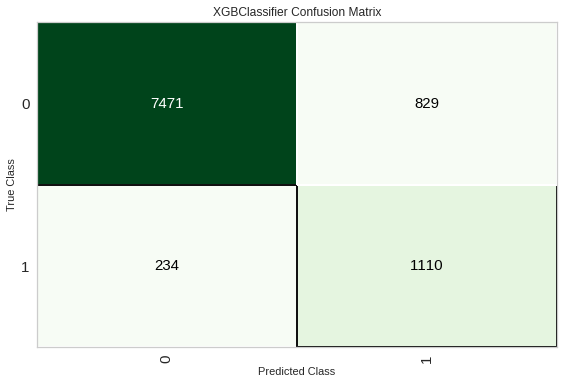

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_xgb,plot='confusion_matrix')

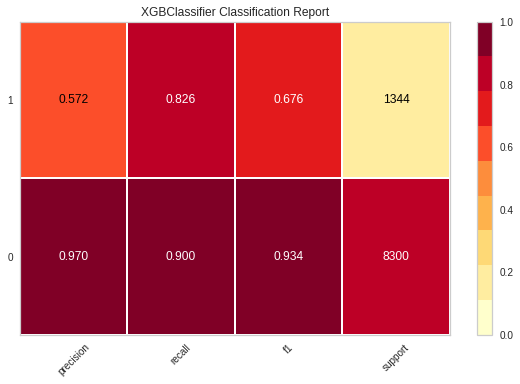

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_xgb,plot='class_report')

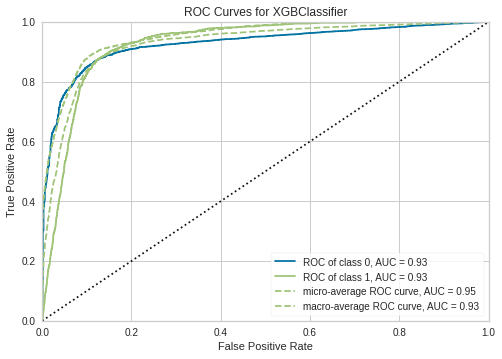

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator=tuned_xgb,plot='auc')

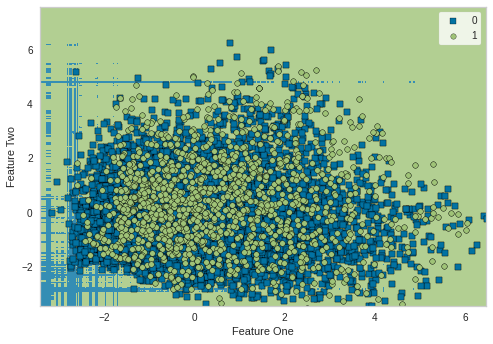

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_xgb,plot='boundary') 

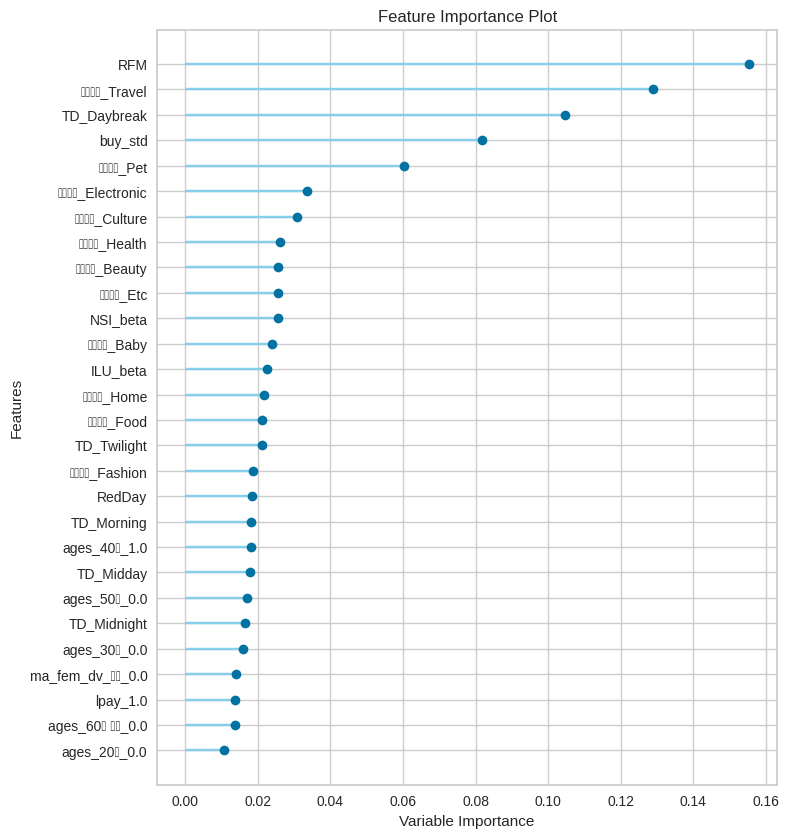

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_xgb, plot='feature_all') #Feature Importance al

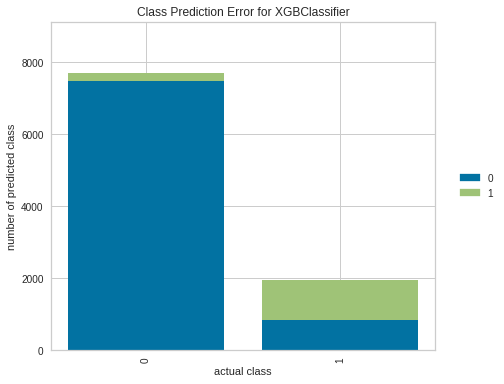

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_xgb,plot='error')

In [ ]:
evaluate_model(tuned_xgb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating T

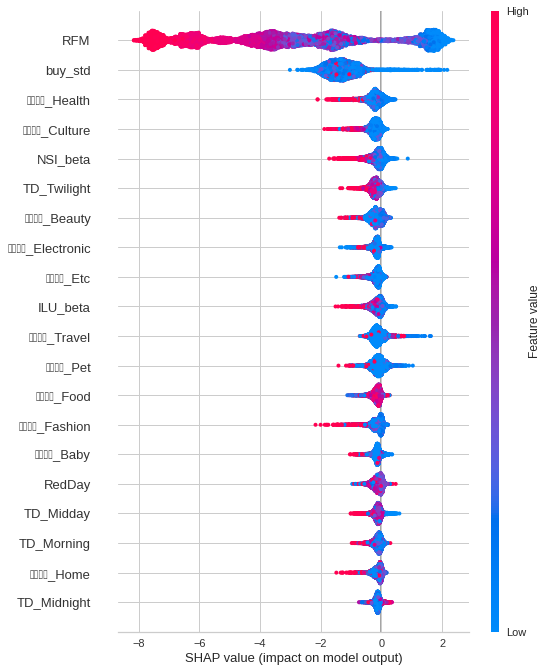

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_xgb,plot='summary')

**Model Finalization**

In [ ]:
final_xgb=finalize_model(tuned_xgb)
print(final_xgb)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
         

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...)


In [ ]:
evaluate_model(final_xgb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
save_model(final_xgb,"/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/final_xgb")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), model_name=/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/final_xgb, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                gamma=0, gpu_id=-1, grow_policy='depthwise',
                                importance_type=None, interaction_constraints='',
                                learning_rate=0.1, max_bin=256,
                                max_cat_to_onehot=4

In [ ]:
from pycaret.classification import load_model 

saved_xgb = load_model('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/final_xgb') 

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/final_xgb, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
# model save 잘 되었는지 확인
new_prediction = predict_model(saved_xgb, data=X_test)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(ml_usecase='classification',
                                      target='target')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_in_TestData(replacement_strategy='least '
                                                                         'frequent',
                                                    targ...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                             

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,대대분류_Pet,대대분류_Travel,RedDay,TD_Midnight,TD_Daybreak,TD_Morning,TD_Midday,TD_Twilight,lpay,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,Label,Score
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,0.0,0.0,0.163265,0.020408,0.0,0.102041,0.326531,0.551020,1,0,1,0,0,1,0,0,14.141682,0.637167,33.810996,0,0.8407
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,0.0,0.0,0.761905,0.000000,0.0,0.190476,0.047619,0.761905,0,1,0,0,1,0,0,0,25.347198,8.351814,17.922563,0,0.9221
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,0.0,0.0,0.363636,0.090909,0.0,0.090909,0.272727,0.545455,0,0,1,1,0,0,0,0,17.752927,0.359481,31.331439,0,0.9548
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,0.0,0.0,0.392694,0.031963,0.0,0.223744,0.433790,0.310502,0,0,1,0,0,1,0,0,0.935807,7.554166,56.247248,0,0.9987
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.250000,0.0,0.250000,0.250000,0.250000,0,1,0,0,0,1,0,0,0.000000,0.000000,21.714145,0,0.9903


**Prediction & F1 score**

In [ ]:
pred_xgb=predict_model(final_xgb,data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=25, reg_alpha=0.001, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
IN

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8875,0.9303,0.8184,0.5664,0.6695,0.6044,0.6193


In [ ]:
pred_xgb

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target,Label,Score
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,0,1,0,0,14.141682,0.637167,33.810996,0,0,0.8407
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,1,0,0,0,25.347198,8.351814,17.922563,0,0,0.9221
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,0,0,0,0,17.752927,0.359481,31.331439,0,0,0.9548
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,0,1,0,0,0.935807,7.554166,56.247248,0,0,0.9987
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0,1,0,0,0.000000,0.000000,21.714145,0,0,0.9903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8261,11310.583968,0.011364,0.017045,0.000000,0.000000,0.000000,0.005682,0.812500,0.022727,0.130682,...,0,0,1,0,12.821127,4.196250,43.855437,0,0,0.9886
8262,89873.467118,0.008197,0.012295,0.024590,0.008197,0.024590,0.061475,0.745902,0.040984,0.065574,...,0,1,0,0,1.766263,1.387466,56.247248,0,0,0.9957
8263,33760.775460,0.000000,0.075472,0.264151,0.000000,0.000000,0.207547,0.433962,0.018868,0.000000,...,0,0,1,0,12.884650,0.570310,30.019415,0,0,0.6224
8264,291698.726485,0.096154,0.000000,0.105769,0.000000,0.009615,0.278846,0.278846,0.163462,0.067308,...,1,0,0,0,15.180392,11.206189,46.924913,0,0,0.9992


In [ ]:
pred_xgb.to_csv("/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/pred_XGB.csv",index=False)

In [ ]:
pred_xgb[['Score','Label']]

,Score,Label
0,0.8407,0
1,0.9221,0
2,0.9548,0
3,0.9987,0
4,0.9903,0
...,...,...
8261,0.9886,0
8262,0.9957,0
8263,0.6224,0
8264,0.9992,0


In [ ]:
pred_xgb['Label'].value_counts()

0    6603
1    1663
Name: Label, dtype: int64